# FLIGHT FARE PREDICTION

In [1]:
import numpy as np                   ## importing necessary liabraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TRAIN DATA

In [161]:
ffp = pd.read_excel(r"C:\Users\khara\Downloads\Data_Train.xlsx")  ## since the data is in form of excel so we have to use read excel to load the data

In [162]:
pd.set_option("display.max_columns", None)   ## it shows the maximum columns
pd.set_option("display.max_rows", None)      ## it shows the maximum rows

In [163]:
ffp.shape   ## it shows the the shape of the database

(10683, 11)

In [164]:
ffp.head()  ## it fetch the first five records

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [165]:
ffp.info()  ## information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [166]:
ffp.isnull().sum()  ## here we are seeing the null values in dataset

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [167]:
ffp.dropna(inplace= True)  ## as there is only one null value present we are dropping that value

In [168]:
len(ffp.columns[ffp.isnull().sum() < 0]) 

0

In [169]:
ffp["Duration"] = ffp["Duration"].str.replace("h" , "*60").str.replace(" ","+").str.replace("m","*1").apply(eval)
## duration column is contain hours and minute and it is of object type so we are converted the hour time into minute
## convert object type into integer

In [170]:
ffp.rename(columns= {"Duration" : "Duration_minutes"},inplace= True) ## renaming the duration column

In [171]:
ffp.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration_minutes,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [172]:
ffp.Duration_minutes.dtypes  # checking the data type of the column

dtype('int64')

In [173]:
ffp["Journey_day"] = pd.to_datetime(ffp.Date_of_Journey , format= "%d/%m/%Y").dt.day  # making a new column as journey day

In [174]:
ffp["journey_month"] = pd.to_datetime(ffp.Date_of_Journey , format= "%d/%m/%Y").dt.month # making the new column as journey month

In [175]:
ffp['Weekday_name_of_Journey'] = pd.to_datetime(ffp.Date_of_Journey, format='%d/%m/%Y').dt.day_name() ## making the new column as Weekday_name_of_Journey 

In [176]:
ffp['Journey_MonthName'] = pd.to_datetime(ffp.Date_of_Journey, format='%d/%m/%Y').dt.month_name()

In [177]:
ffp.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration_minutes,Total_Stops,Additional_Info,Price,Journey_day,journey_month,Weekday_name_of_Journey,Journey_MonthName
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,Sunday,March
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5,Wednesday,May
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6,Sunday,June
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5,Sunday,May
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3,Friday,March


In [178]:
ffp.journey_month.dtype

dtype('int64')

In [179]:
ffp.drop(["Date_of_Journey"], axis=1 , inplace= True) ## dropping the date of journey column

In [180]:
ffp["Dep_hour"] = pd.to_datetime(ffp["Dep_Time"]).dt.hour # making a new column as dep_hour

In [181]:
ffp["Dep_minute"] = pd.to_datetime(ffp["Dep_Time"]).dt.minute  ## making a new column as dap_minute

In [182]:
ffp.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration_minutes,Total_Stops,Additional_Info,Price,Journey_day,journey_month,Weekday_name_of_Journey,Journey_MonthName,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,Sunday,March,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5,Wednesday,May,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6,Sunday,June,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5,Sunday,May,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3,Friday,March,16,50


In [183]:
ffp.drop(["Dep_Time"], axis=1 ,inplace= True) # dropping the dep_time column

In [184]:
ffp["Arrival_hour"] = pd.to_datetime(ffp["Arrival_Time"]).dt.hour  # # making a new column as arrival_hour

In [185]:
ffp["Arrival_minute"] = pd.to_datetime(ffp["Arrival_Time"]).dt.minute # making a new column as arrival_minute

In [186]:
ffp.drop(["Arrival_Time"], axis= 1 , inplace= True)  # dropping the arrival_time column

In [187]:
ffp.head()

,Airline,Source,Destination,Route,Duration_minutes,Total_Stops,Additional_Info,Price,Journey_day,journey_month,Weekday_name_of_Journey,Journey_MonthName,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,Sunday,March,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,Wednesday,May,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,Sunday,June,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,Sunday,May,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,Friday,March,16,50,21,35


In [188]:
ffp.dtypes          ## it shows the data type of the columns

Airline                    object
Source                     object
Destination                object
Route                      object
Duration_minutes            int64
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_day                 int64
journey_month               int64
Weekday_name_of_Journey    object
Journey_MonthName          object
Dep_hour                    int64
Dep_minute                  int64
Arrival_hour                int64
Arrival_minute              int64
dtype: object

In [189]:
ffp.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# BOX Plot graph

<AxesSubplot:xlabel='Weekday_name_of_Journey', ylabel='Price'>

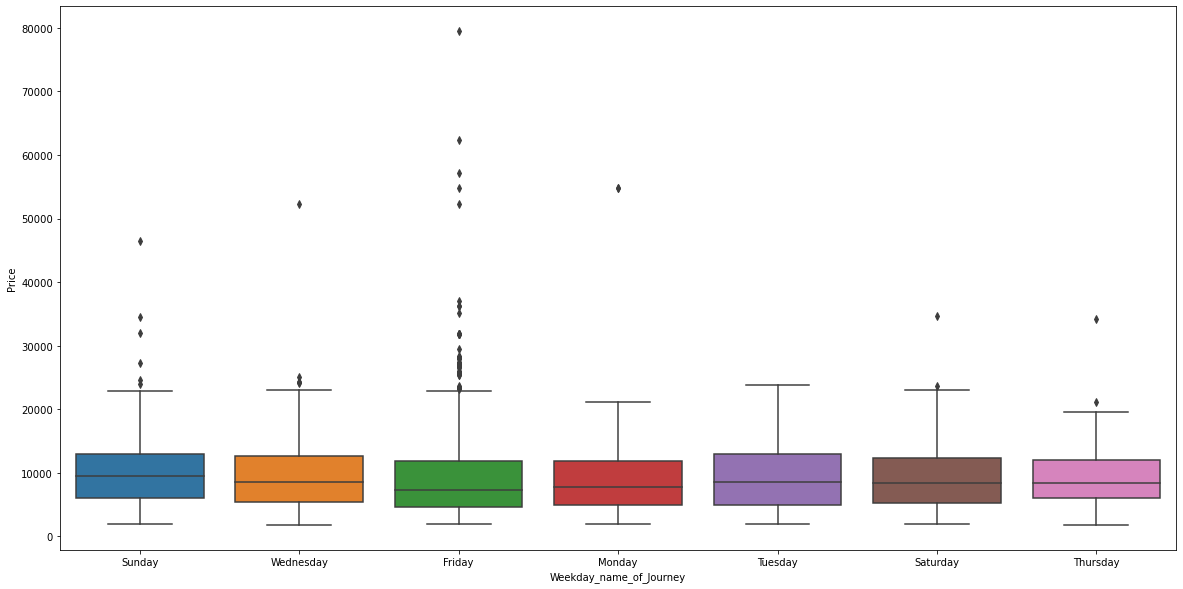

In [190]:
## Weekday_name_of_Journey v/s price
## we are compairing the prices in a week
## from graph we are seeing that at friday we have highest price
plt.figure(figsize=(20, 10))
sns.boxplot(x = "Weekday_name_of_Journey" , y = "Price" , data = ffp)

In [191]:
Weekday_name_of_Journey = ffp[["Weekday_name_of_Journey"]]
Weekday_name_of_Journey = pd.get_dummies(Weekday_name_of_Journey , drop_first= True).astype("int64")
Weekday_name_of_Journey.head()

,Weekday_name_of_Journey_Monday,Weekday_name_of_Journey_Saturday,Weekday_name_of_Journey_Sunday,Weekday_name_of_Journey_Thursday,Weekday_name_of_Journey_Tuesday,Weekday_name_of_Journey_Wednesday
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,0,0


<AxesSubplot:xlabel='Airline', ylabel='Price'>

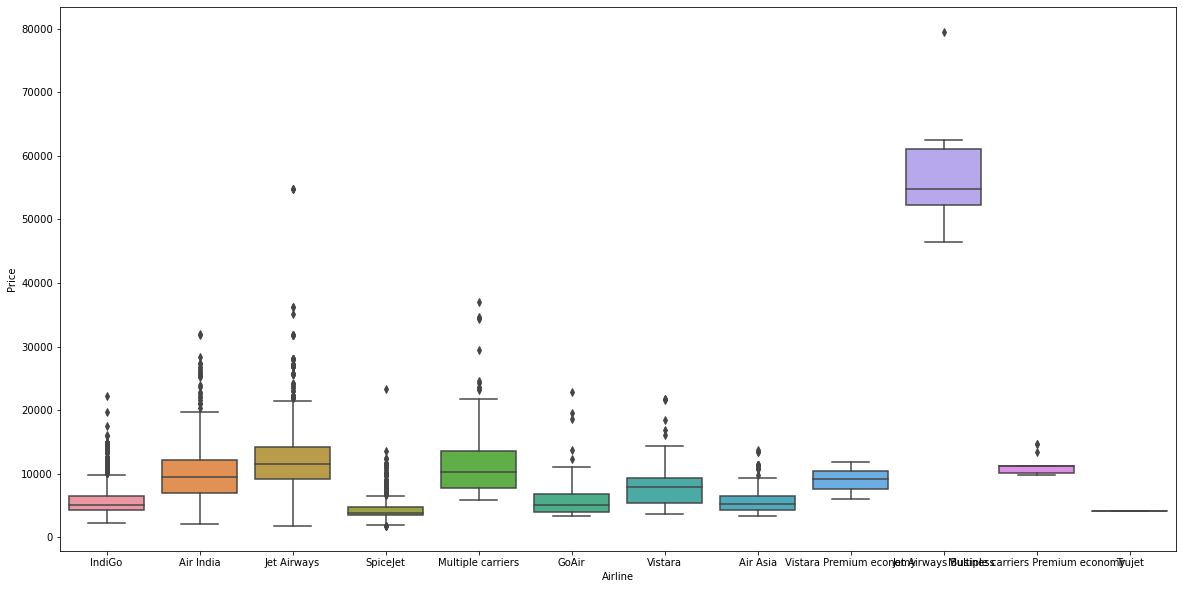

In [192]:
## Airline v/s Price
plt.figure(figsize=(20, 10))
sns.boxplot(x = "Airline" , y = "Price" , data = ffp )

In [193]:
ffp[ffp.Airline == 'Trujet'] # We remove this row

,Airline,Source,Destination,Route,Duration_minutes,Total_Stops,Additional_Info,Price,Journey_day,journey_month,Weekday_name_of_Journey,Journey_MonthName,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
2878,Trujet,Mumbai,Hyderabad,BOM → NDC → HYD,195,1 stop,No info,4140,6,3,Wednesday,March,13,5,16,20


In [194]:
ffp = ffp[ffp.Airline != 'Trujet']

In [195]:
price_outliers = np.where(ffp.Price>30000)  ##from graph we see that there are outliers 
price_outliers


(array([  396,   657,  1478,  1629,  2099,  2618,  2693,  2923,  3699,
         5012,  5371,  5438,  5661,  5718,  6575,  6990,  7350,  7616,
         8597,  9018,  9713, 10050, 10362, 10437], dtype=int64),)

In [196]:
len(price_outliers[0])  # there are 24 outliers

24

In [197]:
ffp = ffp[ffp.Price<30000]

<AxesSubplot:xlabel='Airline', ylabel='Price'>

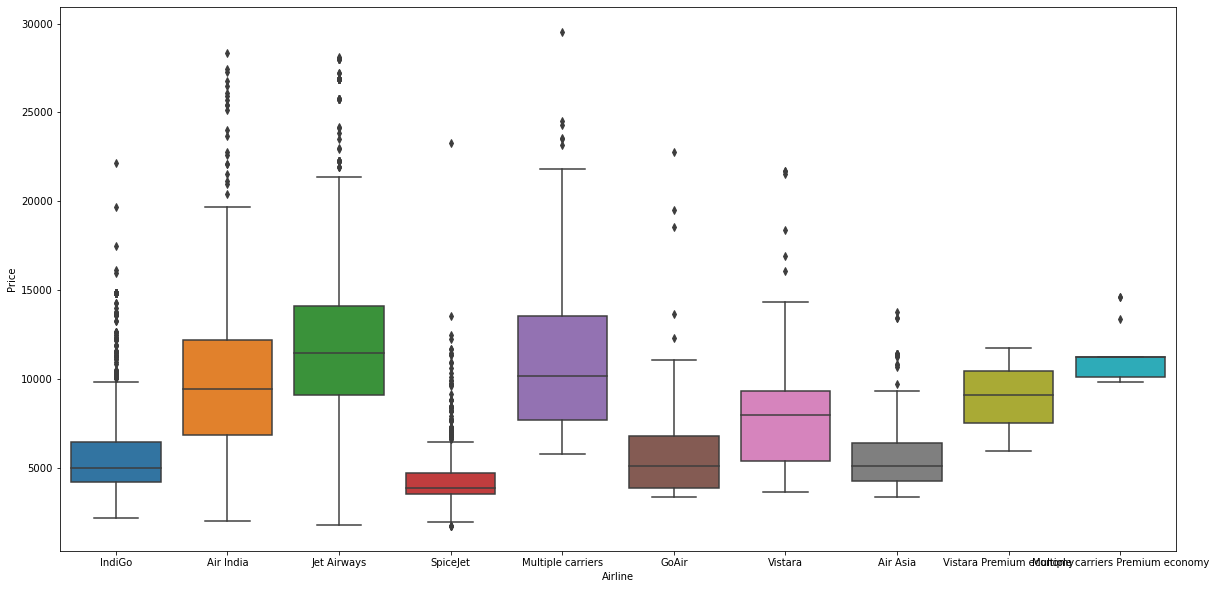

In [198]:
## Airline v/s Price (considering price less than 30000)
plt.figure(figsize= (20,10))     # from the graph we can seen that jet airways buisiness have the highest price
sns.boxplot(x = "Airline" , y = "Price" , data = ffp)    

In [199]:
Airline = ffp[["Airline"]]   ## as airline is nominal categorical data so we performing one hot encoding
Airline = pd.get_dummies(Airline , drop_first= True).astype('int64')
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


In [200]:
ffp.Source.value_counts()

Delhi       4530
Kolkata     2870
Banglore    2180
Mumbai       696
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

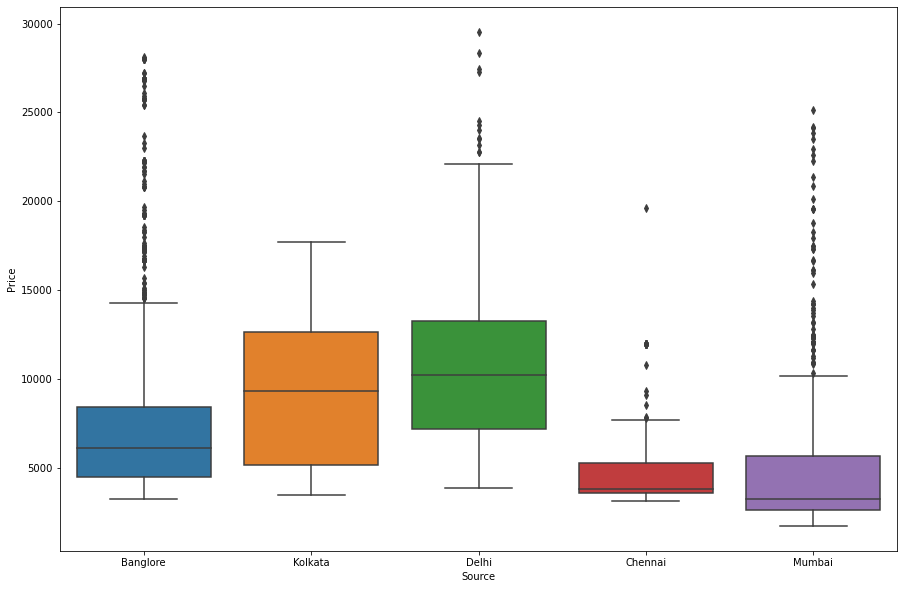

In [201]:
# Source vs Price
plt.figure(figsize= (15,10))
sns.boxplot(x = "Source" , y = "Price" , data = ffp)

In [202]:
Source = ffp[["Source"]]     ## as Source is nominal categorical data so we performing one hot encoding
Source = pd.get_dummies(Source , drop_first= True).astype('int64')
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [203]:
ffp.Destination.value_counts()

Cochin       4530
Banglore     2870
Delhi        1265
New Delhi     915
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

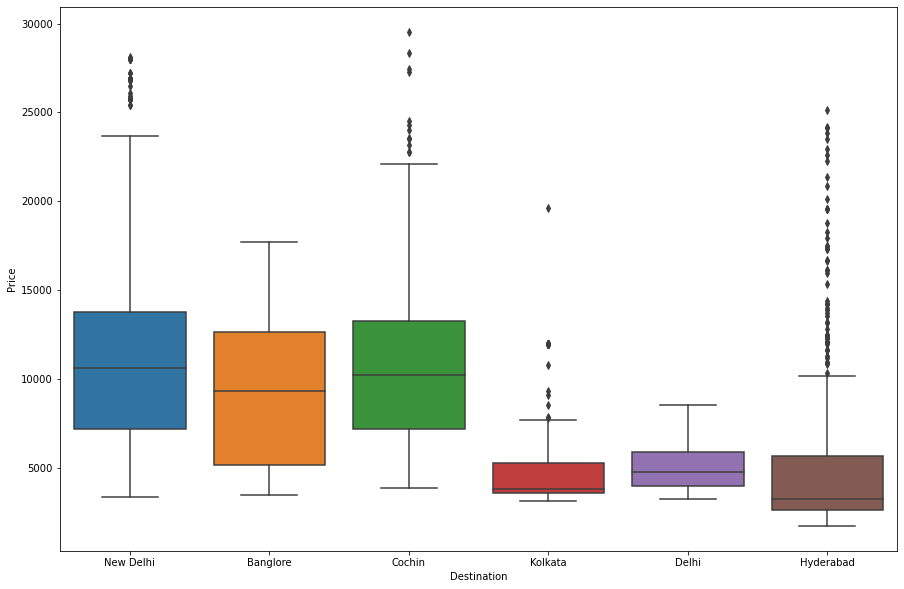

In [204]:
# Destination v/s Price
plt.figure(figsize=(15,10))
sns.boxplot(x = "Destination" , y = "Price" ,data= ffp)

In [205]:
Destination = ffp[["Destination"]]   ## as the destination is a nominal categorical data so we performing one hot encoding
Destination = pd.get_dummies(Destination , drop_first= True).astype('int64')
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [206]:
Destination.dtypes

Destination_Cochin       int64
Destination_Delhi        int64
Destination_Hyderabad    int64
Destination_Kolkata      int64
Destination_New Delhi    int64
dtype: object

In [207]:
ffp.Additional_Info.value_counts()

No info                         8326
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    15
Change airports                    7
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Business class                     1
Name: Additional_Info, dtype: int64

<AxesSubplot:xlabel='Journey_MonthName', ylabel='Price'>

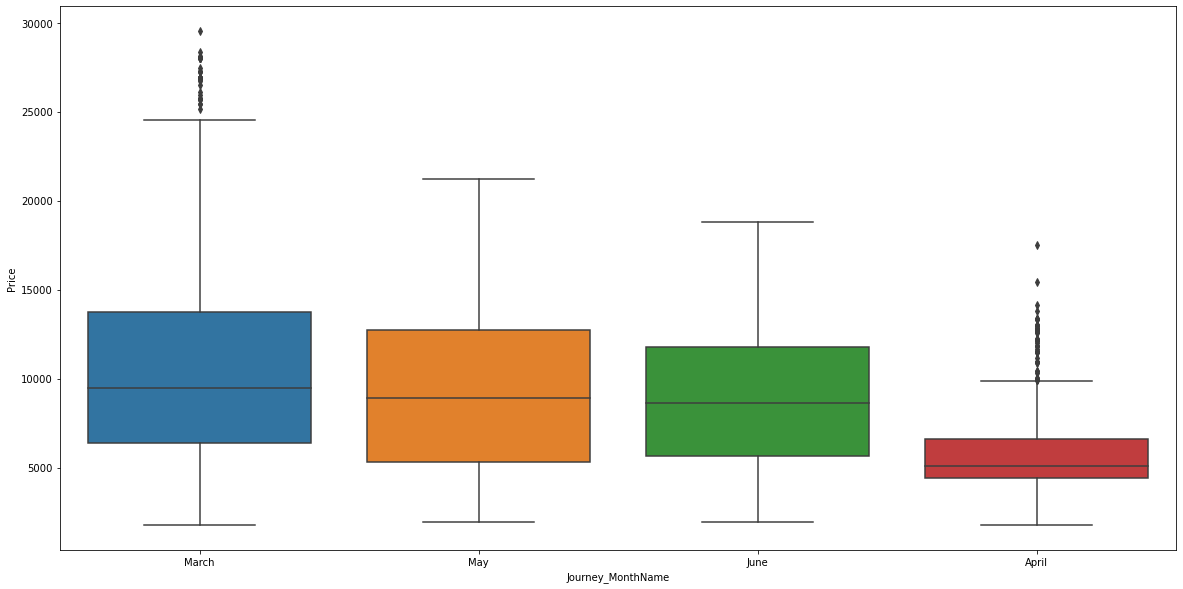

In [208]:
# journey_month v/s price
plt.figure(figsize=(20,10)) ## we are seeing that in march month we have more prices
sns.boxplot( x = "Journey_MonthName" , y = "Price" , data = ffp)

In [209]:
months = ffp[['Journey_MonthName']]
months = pd.get_dummies(months,drop_first=True).astype('Int64')
months.head()

,Journey_MonthName_June,Journey_MonthName_March,Journey_MonthName_May
0,0,1,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [210]:
## almost 80% of no information data drop that column
## route column and Total_ stop columns are giving similar information so we drop route column 

In [211]:
ffp.drop(["Additional_Info","Route"],axis= 1 , inplace= True)

In [212]:
ffp.head()

,Airline,Source,Destination,Duration_minutes,Total_Stops,Price,Journey_day,journey_month,Weekday_name_of_Journey,Journey_MonthName,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,24,3,Sunday,March,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,7662,1,5,Wednesday,May,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,9,6,Sunday,June,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,12,5,Sunday,May,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,1,3,Friday,March,16,50,21,35


In [213]:
ffp.Total_Stops.value_counts()

1 stop      5606
non-stop    3490
2 stops     1515
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [214]:
ffp.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4 }, inplace = True) # it is an ordinal data

In [215]:
ffp.head()

,Airline,Source,Destination,Duration_minutes,Total_Stops,Price,Journey_day,journey_month,Weekday_name_of_Journey,Journey_MonthName,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,Sunday,March,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,7662,1,5,Wednesday,May,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,Sunday,June,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,Sunday,May,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,Friday,March,16,50,21,35


In [216]:
## concatenate the dataframes = ffp , Airline , Source , Destination

ffp_data_train = pd.concat([ffp , Airline , Source , Destination , Weekday_name_of_Journey, months] ,axis=1,join='inner') # storing in another variable

In [217]:
ffp_data_train.head()

,Airline,Source,Destination,Duration_minutes,Total_Stops,Price,Journey_day,journey_month,Weekday_name_of_Journey,Journey_MonthName,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Weekday_name_of_Journey_Monday,Weekday_name_of_Journey_Saturday,Weekday_name_of_Journey_Sunday,Weekday_name_of_Journey_Thursday,Weekday_name_of_Journey_Tuesday,Weekday_name_of_Journey_Wednesday,Journey_MonthName_June,Journey_MonthName_March,Journey_MonthName_May
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,Sunday,March,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,Air India,Kolkata,Banglore,445,2,7662,1,5,Wednesday,May,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,Sunday,June,9,25,4,25,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,Sunday,May,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,Friday,March,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [218]:
ffp_data_train.drop(["Airline","Source","Destination","Weekday_name_of_Journey","Journey_MonthName","journey_month"], axis= 1 , inplace= True) ## droping the object type column as we have done one hot encoding so we have mecessary information 

In [219]:
ffp_data_train.head()

,Duration_minutes,Total_Stops,Price,Journey_day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Weekday_name_of_Journey_Monday,Weekday_name_of_Journey_Saturday,Weekday_name_of_Journey_Sunday,Weekday_name_of_Journey_Thursday,Weekday_name_of_Journey_Tuesday,Weekday_name_of_Journey_Wednesday,Journey_MonthName_June,Journey_MonthName_March,Journey_MonthName_May
0,170,0,3897,24,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,445,2,7662,1,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1140,2,13882,9,9,25,4,25,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3,325,1,6218,12,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,285,1,13302,1,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [220]:
ffp_data_train.shape  

(10657, 35)

In [221]:
ffp_data_train.dtypes

Duration_minutes                             int64
Total_Stops                                  int64
Price                                        int64
Journey_day                                  int64
Dep_hour                                     int64
Dep_minute                                   int64
Arrival_hour                                 int64
Arrival_minute                               int64
Airline_Air India                            int64
Airline_GoAir                                int64
Airline_IndiGo                               int64
Airline_Jet Airways                          int64
Airline_Multiple carriers                    int64
Airline_Multiple carriers Premium economy    int64
Airline_SpiceJet                             int64
Airline_Vistara                              int64
Airline_Vistara Premium economy              int64
Source_Chennai                               int64
Source_Delhi                                 int64
Source_Kolkata                 

# TEST

In [84]:
ffp_test = pd.read_excel(r"C:\Users\khara\Downloads\Test_set.xlsx")

In [85]:
ffp_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [86]:
ffp_test.shape

(2671, 10)

In [87]:
ffp_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [88]:
len(ffp_test.columns[ffp_test.isnull().sum() < 0])  ## length of null values are zero

0

In [89]:
ffp_test["Journey_day"] = pd.to_datetime(ffp_test.Date_of_Journey , format= '%d/%m/%Y' ).dt.day

In [90]:
ffp_test["journey_month"] = pd.to_datetime(ffp_test.Date_of_Journey , format= "%d/%m/%Y").dt.month

In [91]:
ffp_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [92]:
ffp_test.drop(["Date_of_Journey"], axis= 1 , inplace= True)

In [93]:
ffp_test["Dep_hour"] = pd.to_datetime(ffp_test.Dep_Time ).dt.hour

In [94]:
ffp_test["Dep_minute"] = pd.to_datetime(ffp_test.Dep_Time) .dt.minute

In [95]:
ffp_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,journey_month,Dep_hour,Dep_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [96]:
ffp_test.drop(["Dep_Time"], axis= 1 , inplace= True)

In [97]:
ffp_test["Arrival_hour"] = pd.to_datetime(ffp_test.Arrival_Time).dt.hour

In [98]:
ffp_test["Arrival_minute"] = pd.to_datetime(ffp_test.Arrival_Time).dt.minute

In [99]:
ffp_test.drop(["Arrival_Time"], axis= 1 ,inplace= True)

In [100]:
ffp_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [101]:
ffp_test["Duration"] = ffp_test["Duration"].str.replace("h" , "*60").str.replace(" " , "+").str.replace("m" , "*1").apply(eval)

In [102]:
ffp_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45


In [103]:
ffp_test.rename(columns= {"Duration" : "Duration_minutes"}, inplace= True)

In [104]:
ffp_test.head()

,Airline,Source,Destination,Route,Duration_minutes,Total_Stops,Additional_Info,Journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45


In [105]:
ffp_test.Additional_Info.value_counts()  ## there are maximum 'no info' columns are present

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [106]:
ffp_test.drop(["Additional_Info", "Route"], axis= 1 , inplace= True)

In [107]:
ffp_test.head()

,Airline,Source,Destination,Duration_minutes,Total_Stops,Journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,655,1 stop,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,240,1 stop,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,1425,1 stop,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,780,1 stop,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,170,non-stop,24,6,23,55,2,45


In [108]:
ffp_test.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4},inplace= True)

In [109]:
ffp_test.head()

,Airline,Source,Destination,Duration_minutes,Total_Stops,Journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,655,1,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,240,1,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,1425,1,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,780,1,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,170,0,24,6,23,55,2,45


In [110]:
Airline = ffp_test[["Airline"]]
Airline = pd.get_dummies(Airline , drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [111]:
Source = ffp_test[["Source"]]
Source = pd.get_dummies(Source , drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [112]:
Destination = ffp_test[["Destination"]]
Destination = pd.get_dummies(Destination , drop_first= True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [113]:
## concatenate the dataframes = ffp_test , Airline , Source , Destination

ffp_data_test = pd.concat([ffp_test , Airline , Source , Destination] , axis= 1)

In [114]:
ffp_data_test.head()

,Airline,Source,Destination,Duration_minutes,Total_Stops,Journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,655,1,6,6,17,30,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,240,1,12,5,6,20,10,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1425,1,21,5,19,15,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,780,1,21,5,8,0,21,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,170,0,24,6,23,55,2,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [115]:
ffp_data_test.drop(["Airline" , "Source" , "Destination"], axis= 1 , inplace= True)

In [116]:
ffp_data_test.head()

,Duration_minutes,Total_Stops,Journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,655,1,6,6,17,30,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,240,1,12,5,6,20,10,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1425,1,21,5,19,15,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,780,1,21,5,8,0,21,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,170,0,24,6,23,55,2,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [117]:
ffp_data_test.shape

(2671, 27)

# FEATURE SELECTION

In [222]:
ffp_data_train.shape

(10657, 35)

In [223]:
ffp_data_train.columns

Index(['Duration_minutes', 'Total_Stops', 'Price', 'Journey_day', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Weekday_name_of_Journey_Monday',
       'Weekday_name_of_Journey_Saturday', 'Weekday_name_of_Journey_Sunday',
       'Weekday_name_of_Journey_Thursday', 'Weekday_name_of_Journey_Tuesday',
       'Weekday_name_of_Journey_Wednesday', 'Journey_MonthName_June',
       'Journey_MonthName_March', 'Journey_MonthName_May'],
      dtype='object')

In [224]:
x = ffp_data_train.loc[:, ['Duration_minutes', 'Total_Stops', 'Journey_day', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Weekday_name_of_Journey_Monday',
       'Weekday_name_of_Journey_Saturday', 'Weekday_name_of_Journey_Sunday',
       'Weekday_name_of_Journey_Thursday', 'Weekday_name_of_Journey_Tuesday',
       'Weekday_name_of_Journey_Wednesday', 'Journey_MonthName_June',
       'Journey_MonthName_March', 'Journey_MonthName_May']]
x.head()

,Duration_minutes,Total_Stops,Journey_day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Weekday_name_of_Journey_Monday,Weekday_name_of_Journey_Saturday,Weekday_name_of_Journey_Sunday,Weekday_name_of_Journey_Thursday,Weekday_name_of_Journey_Tuesday,Weekday_name_of_Journey_Wednesday,Journey_MonthName_June,Journey_MonthName_March,Journey_MonthName_May
0,170,0,24,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,445,2,1,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1140,2,9,9,25,4,25,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3,325,1,12,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,285,1,1,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [225]:
y = ffp_data_train.iloc[:,2]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

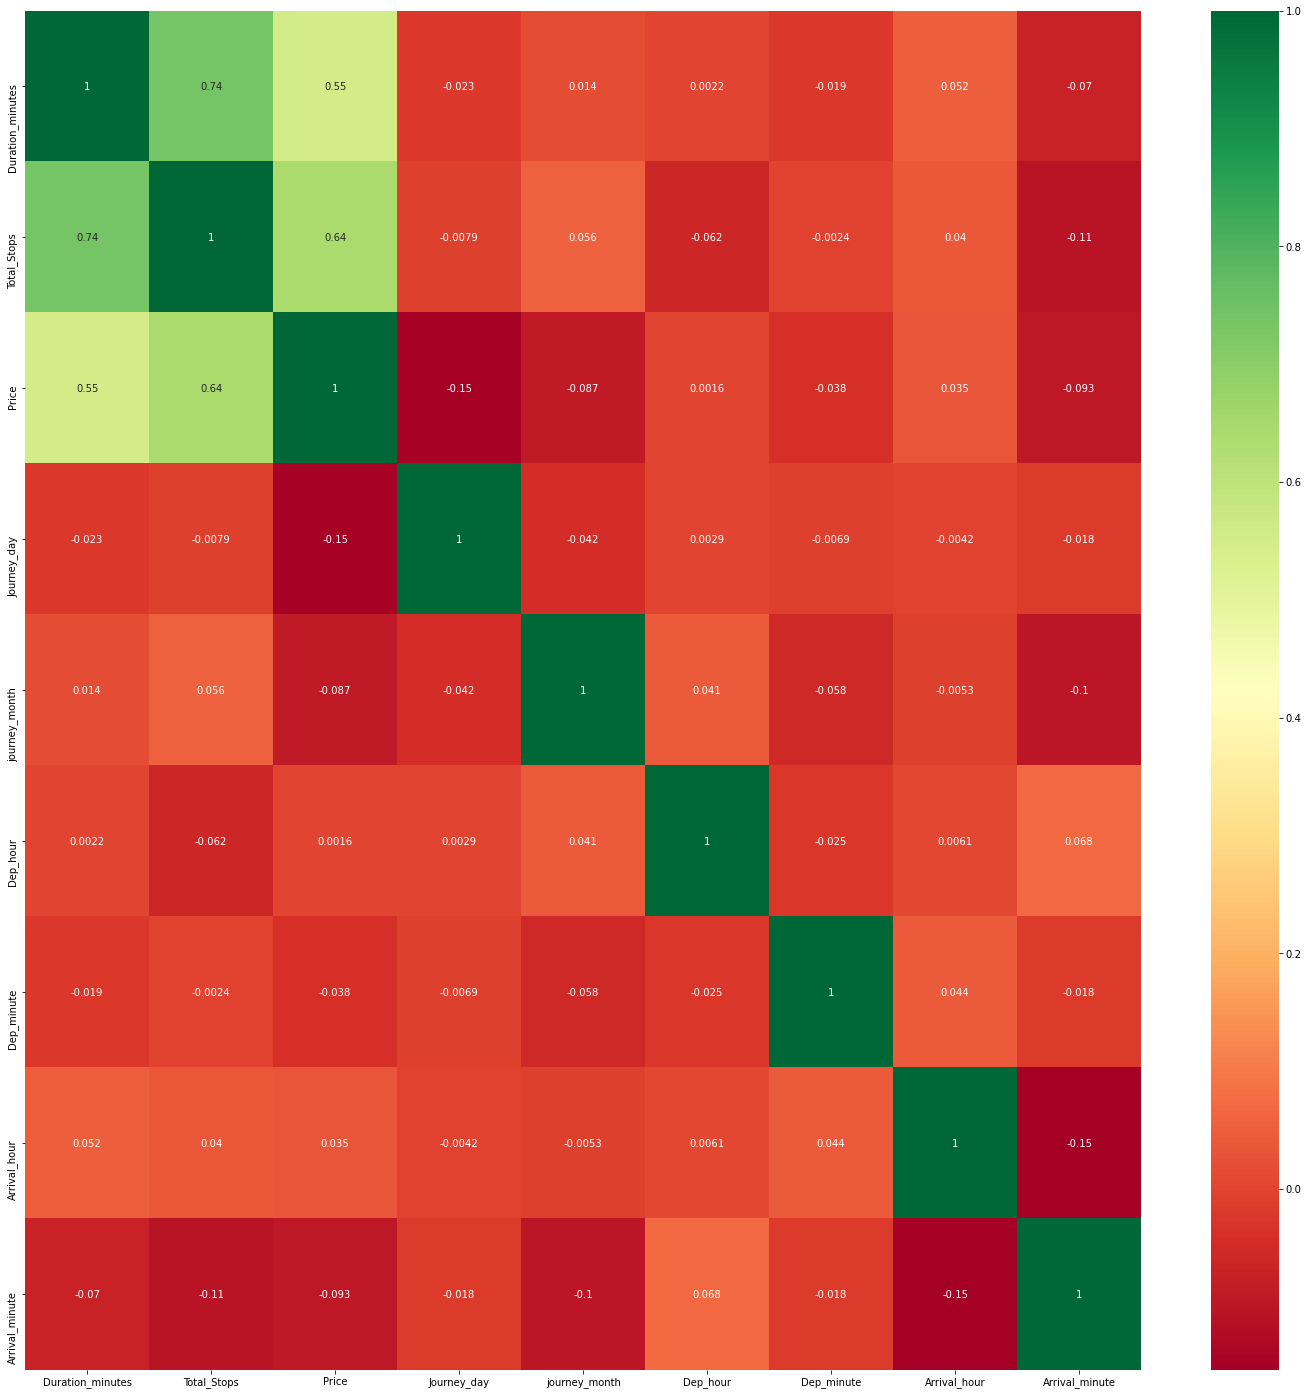

In [226]:
plt.figure(figsize=(25,25))
sns.heatmap(ffp.corr() , annot = True , cmap= "RdYlGn" )
plt.show()

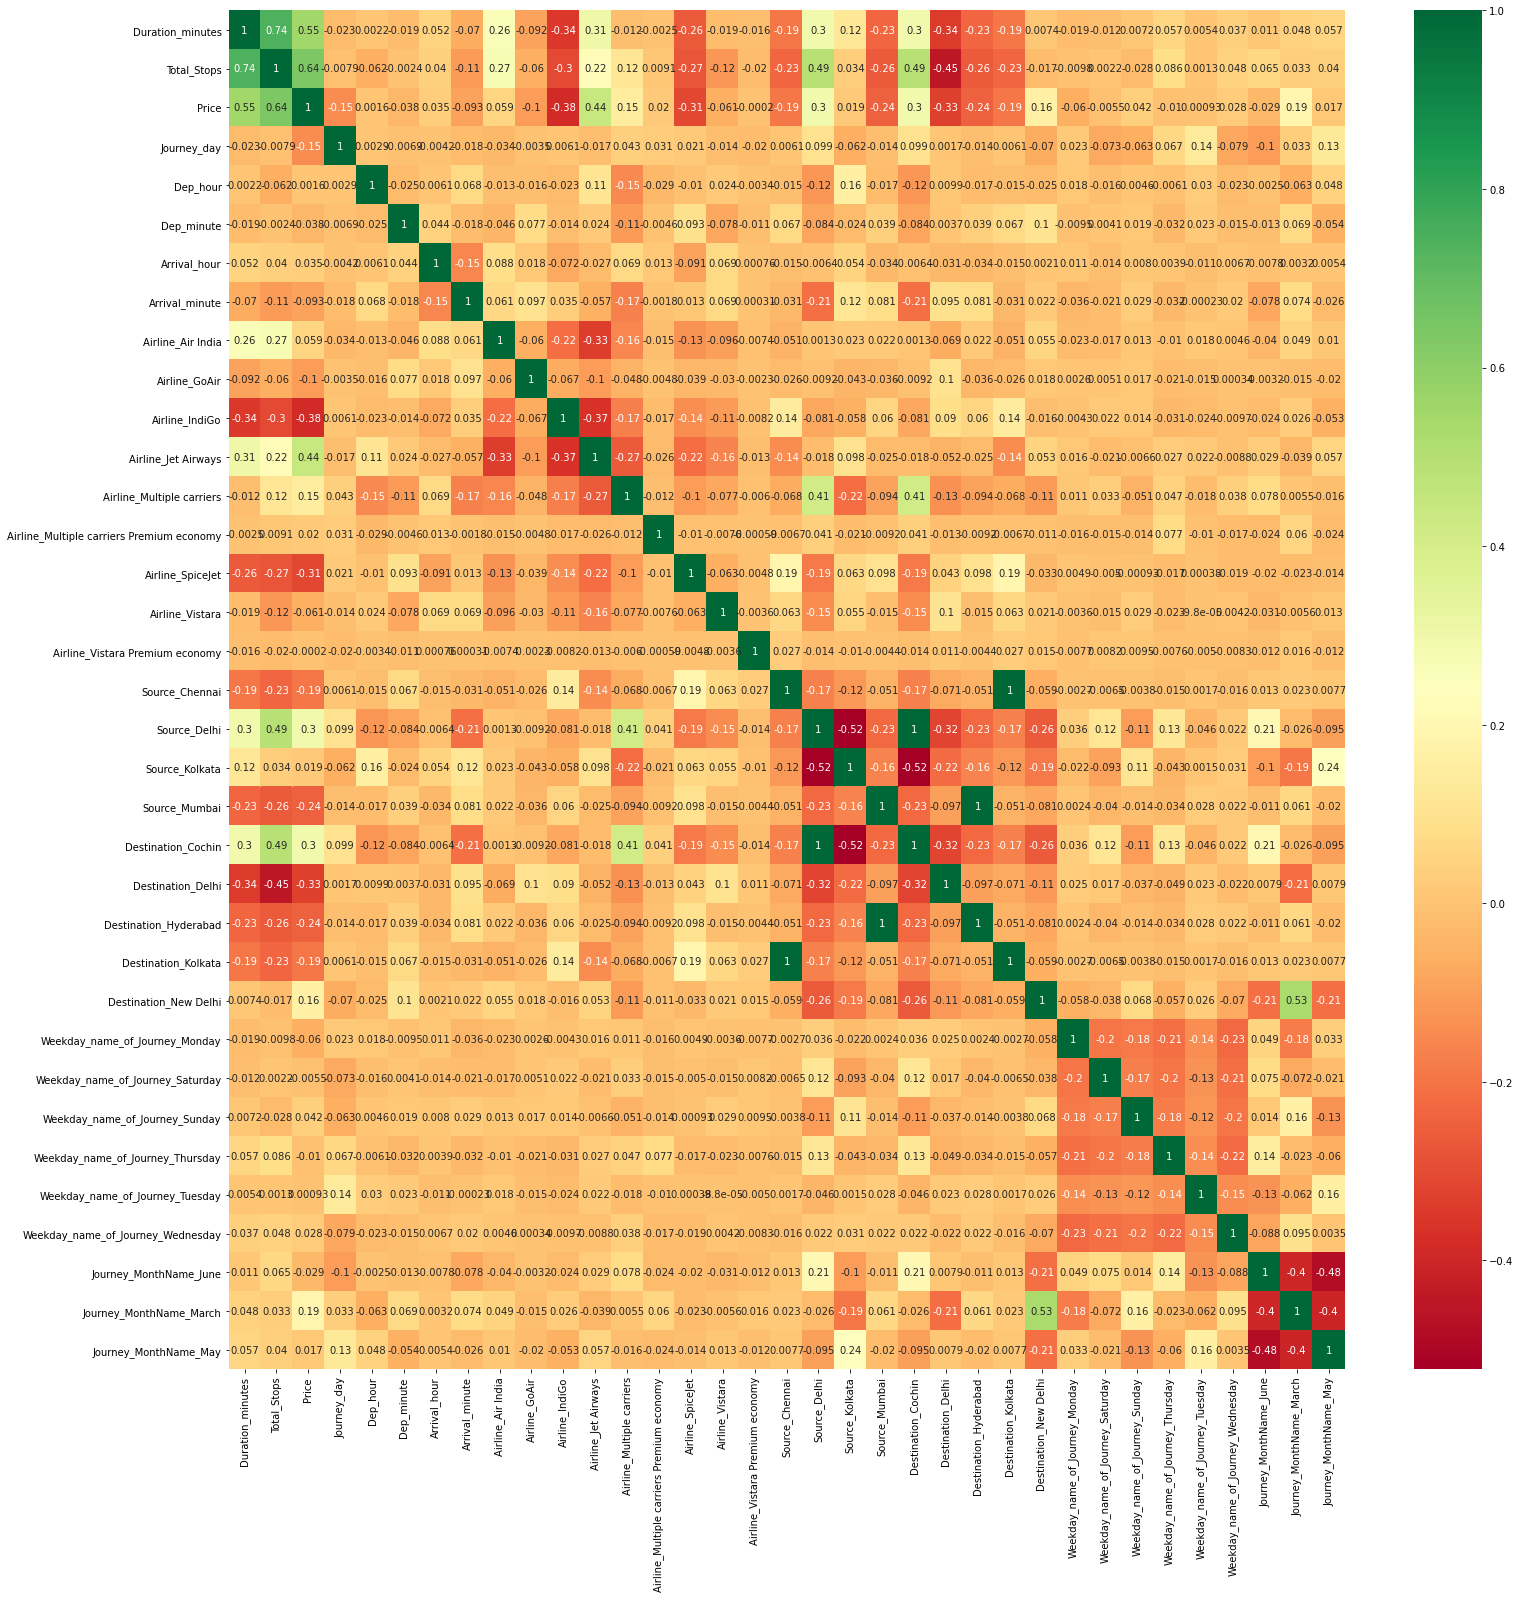

In [227]:
plt.figure(figsize=(25,25))
sns.heatmap(ffp_data_train.corr() , annot = True , cmap= "RdYlGn" )
plt.show()

In [228]:
ffp_data_train.isnull().values.any()    ## to check the nan values

False

In [229]:
ffp_data_train.head()

,Duration_minutes,Total_Stops,Price,Journey_day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Weekday_name_of_Journey_Monday,Weekday_name_of_Journey_Saturday,Weekday_name_of_Journey_Sunday,Weekday_name_of_Journey_Thursday,Weekday_name_of_Journey_Tuesday,Weekday_name_of_Journey_Wednesday,Journey_MonthName_June,Journey_MonthName_March,Journey_MonthName_May
0,170,0,3897,24,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,445,2,7662,1,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1140,2,13882,9,9,25,4,25,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3,325,1,6218,12,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,285,1,13302,1,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [230]:
ffp_data_train.tail()

,Duration_minutes,Total_Stops,Price,Journey_day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Weekday_name_of_Journey_Monday,Weekday_name_of_Journey_Saturday,Weekday_name_of_Journey_Sunday,Weekday_name_of_Journey_Thursday,Weekday_name_of_Journey_Tuesday,Weekday_name_of_Journey_Wednesday,Journey_MonthName_June,Journey_MonthName_March,Journey_MonthName_May
10678,150,0,4107,9,19,55,22,25,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10679,155,0,4145,27,20,45,23,20,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10680,180,0,7229,27,8,20,11,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
10681,160,0,12648,1,11,30,14,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
10682,500,2,11753,9,10,55,19,15,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [231]:
y.isnull().values.any()

False

In [232]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [233]:
print(selection.feature_importances_)

[1.36980502e-01 2.52406914e-01 1.03876253e-01 2.54345251e-02
 2.65518189e-02 2.38597839e-02 2.00080524e-02 1.59188088e-02
 1.86277607e-03 1.59300965e-02 1.60991749e-01 2.38698160e-02
 8.90283106e-04 2.62548773e-03 5.93851506e-03 5.39655007e-05
 4.45942714e-04 1.51768384e-02 3.57016443e-03 6.77929068e-03
 1.35122054e-02 1.75299837e-02 7.64968283e-03 5.70720453e-04
 2.08891576e-02 5.44872243e-03 5.25740876e-03 9.27128010e-03
 8.30042455e-03 3.75420072e-03 8.57837754e-03 9.70062007e-03
 3.69550999e-02 9.41053224e-03]


In [234]:
## plotting graph of feature selection for better visuallization

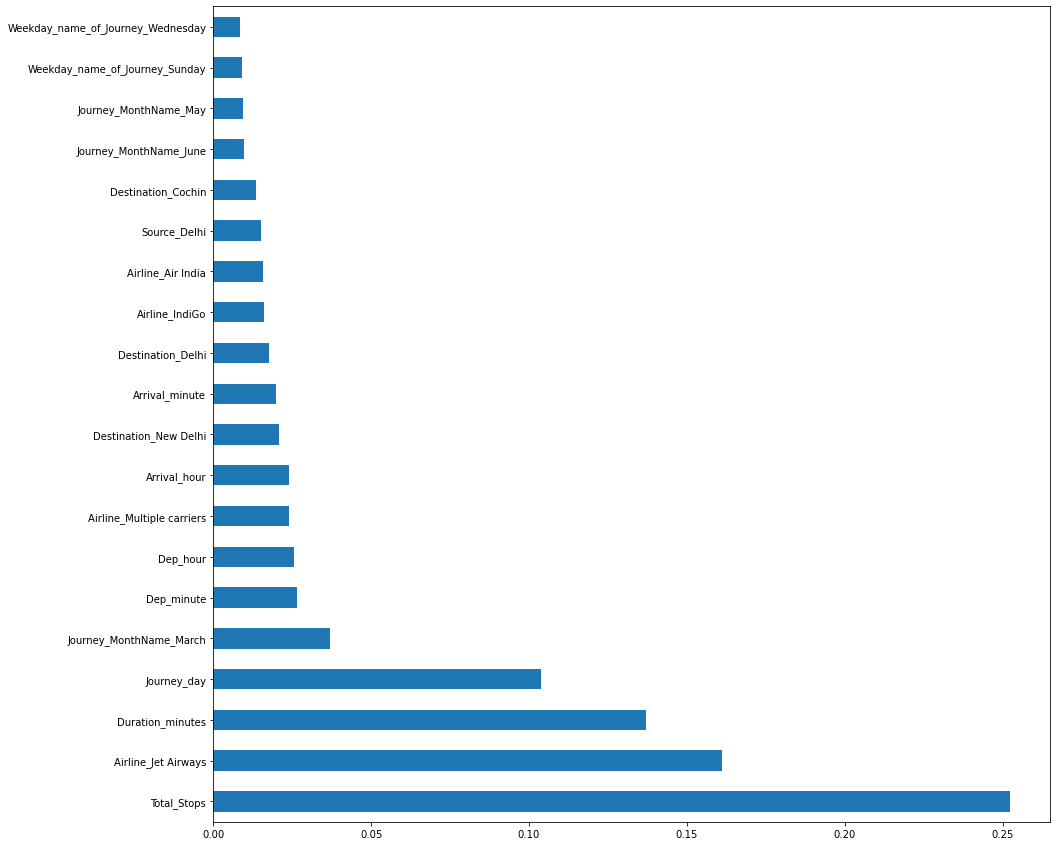

In [235]:
plt.figure(figsize=(15,15))
feat_importances = pd.Series(selection.feature_importances_ , index = x.columns)
feat_importances.nlargest(20).plot(kind = "barh")
plt.show()

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
x_train ,  x_test ,y_train , y_test = train_test_split(x , y , test_size= 0.2 , random_state=101)

In [238]:
x_train.shape

(8525, 34)

In [239]:
y_train.shape

(8525,)

In [240]:
x_test.shape

(2132, 34)

In [241]:
y_test.shape

(2132,)

In [242]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train , y_train)

RandomForestRegressor()

In [243]:
y_pred = reg_rf.predict(x_test)

In [244]:
reg_rf.score(x_train,y_train)

0.952951136346262

In [245]:
reg_rf.score( x_test , y_test)

0.831526149622873

C:\Users\khara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


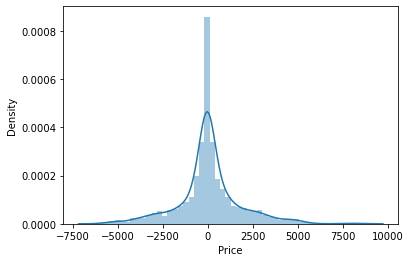

In [246]:
sns.distplot(y_test - y_pred)  ## results are normally distributed
plt.show()

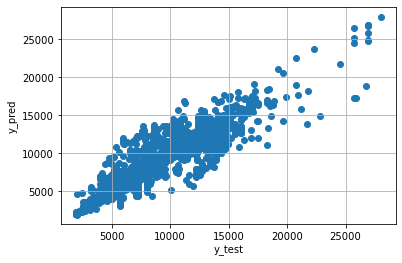

In [247]:
plt.scatter(y_test , y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.grid()
plt.show()

In [248]:
from sklearn import metrics

In [249]:
print("MAE:", metrics.mean_absolute_error(y_test , y_pred))
print("MSE:", metrics.mean_squared_error(y_test , y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test , y_pred)))

MAE: 1122.4776197192948
MSE: 3022955.119946209
RMSE: 1738.6647520284664


In [250]:
Accuracy =metrics.r2_score(y_test , y_pred)* 100
Accuracy

83.1526149622873

# Hyperparameter Tunning 

   1 . RandomizedSearchCV  
for check the best hyperparameter and to get more accuracy


In [251]:
from sklearn.model_selection import RandomizedSearchCV

In [254]:
# Number of trees in RF
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider
max_features = ['auto', 'sqrt']
# Max level in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# Min sample split
min_samples_split = [2, 5, 10, 15, 100]
# Min sample in leaf node
min_samples_leaf = [1, 2, 5, 10]

In [255]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [256]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [257]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [258]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [259]:
prediction = rf_random.predict(x_test)

In [260]:
rf_random.score(x_test,y_test)

-2712200.4368812307

<Figure size 576x576 with 0 Axes>

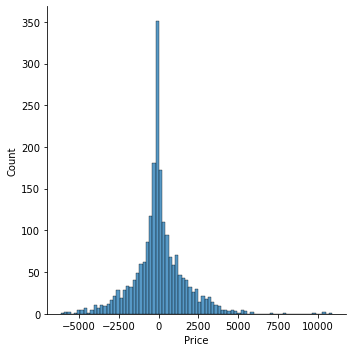

In [261]:
plt.figure(figsize=(8, 8))
sns.displot(y_test-prediction)
plt.show()

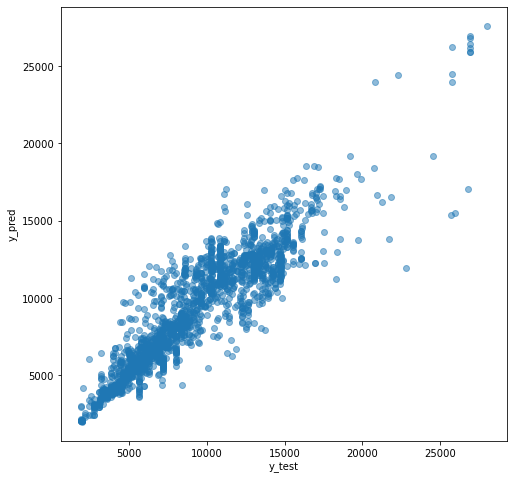

In [262]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, prediction, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [263]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 1101.8739297017714
MSE: 2712200.4368812307
RMSE: 1646.8759628099594


In [264]:
Accuracy = metrics.r2_score(y_test, prediction)*100
Accuracy

84.8844977028955